### Pre-process tweets for trait extraction
##### Tweets from kaggle with tweets of :
- `#ElonMusk`
- `#BillGates`
- `#Ed Lee`

#### Tweet pre-processing steps:
- Remove URLs
- Remove Punctuation
- Remove Stopwords
- Remove non-alphabetic characters

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load Data

In [13]:
bgates_df=pd.read_csv('./data/tweets_BillGates.csv')
elon_df=pd.read_csv('./data/tweets_elonmusk.csv')
edlee_df=pd.read_csv('./data/tweets_mayoredlee.csv')

# number of tweets per user
print('Number of tweets per user')
print('Bill Gates:', bgates_df.shape[0])
print('Elon Musk:', elon_df.shape[0])
print('Ed Lee:', edlee_df.shape[0])

Number of tweets per user
Bill Gates: 2087
Elon Musk: 2678
Ed Lee: 2447


In [15]:
elon_df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2678 entries, 0 to 2677
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   screen_name                     2678 non-null   object 
 1   user_id                         2678 non-null   int64  
 2   created_at                      2678 non-null   object 
 3   status_id                       2678 non-null   float64
 4   text                            2678 non-null   object 
 5   retweet_count                   2678 non-null   int64  
 6   favorite_count                  2678 non-null   int64  
 7   is_quote_status                 2678 non-null   bool   
 8   quote_status_id                 97 non-null     float64
 9   is_retweet                      2678 non-null   bool   
 10  retweet_status_id               0 non-null      float64
 11  in_reply_to_status_status_id    1564 non-null   float64
 12  in_reply_to_status_user_id      15

In [17]:
# merge all dataframes
all_df = pd.concat([bgates_df, elon_df, edlee_df], axis=0)

<class 'pandas.core.frame.DataFrame'>
Index: 7212 entries, 0 to 2446
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   screen_name                     7212 non-null   object 
 1   user_id                         7212 non-null   int64  
 2   created_at                      7212 non-null   object 
 3   status_id                       7212 non-null   float64
 4   text                            7212 non-null   object 
 5   retweet_count                   7212 non-null   int64  
 6   favorite_count                  7212 non-null   int64  
 7   is_quote_status                 7212 non-null   bool   
 8   quote_status_id                 198 non-null    float64
 9   is_retweet                      7212 non-null   bool   
 10  retweet_status_id               0 non-null      float64
 11  in_reply_to_status_status_id    1671 non-null   float64
 12  in_reply_to_status_user_id      1679 no

In [21]:
# drop all columns except 'text' & 'screen name'
all_df = all_df[['text', 'screen_name']]
all_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7212 entries, 0 to 2446
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   text         7212 non-null   object
 1   screen_name  7212 non-null   object
dtypes: object(2)
memory usage: 169.0+ KB


In [24]:
# rename columns to tweets and author
all_df.columns = ['tweets', 'author']
all_df.head()

,tweets,author
0,Tanzania hopes to eliminate one of the world’s...,BillGates
1,"By investing in R&amp;D, I know we can discove...",BillGates
2,This unusual tool for fighting disease turns o...,BillGates
3,My first trip to Africa with Melinda was the c...,BillGates
4,"“The death that didn’t happen is not visible.""...",BillGates


In [27]:
# remove duplicates, rows with missing values and reset index
all_df = all_df.drop_duplicates()
all_df = all_df.dropna()
all_df = all_df.reset_index(drop=True)
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7181 entries, 0 to 7180
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweets  7181 non-null   object
 1   author  7181 non-null   object
dtypes: object(2)
memory usage: 112.3+ KB


In [37]:
# show the word count distribution
all_df['word_count'] = all_df['tweets'].apply(lambda x: len(str(x).split()))
all_df['word_count'].describe()

count    7181.000000
mean       16.201086
std         5.556391
min         1.000000
25%        14.000000
50%        17.000000
75%        20.000000
max        31.000000
Name: word_count, dtype: float64

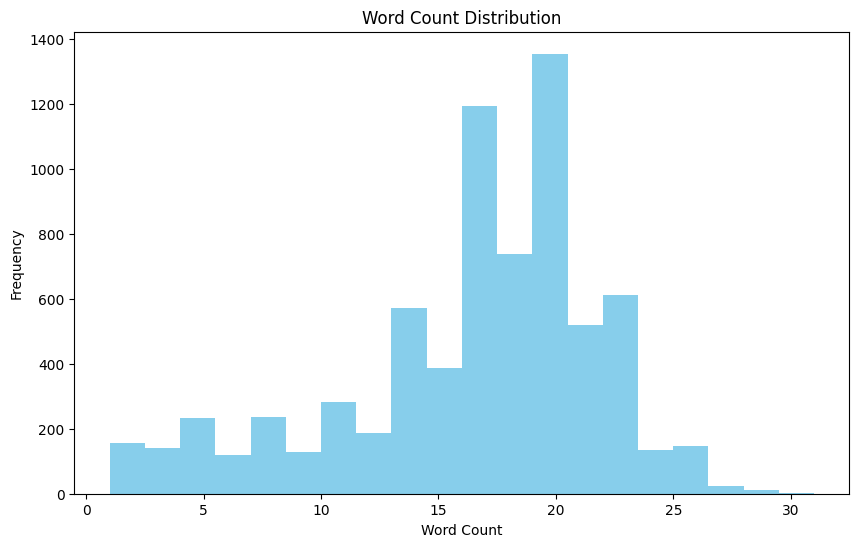

In [38]:
# plot the word count distribution
plt.figure(figsize=(10, 6))
plt.hist(all_df['word_count'], bins=20, color='skyblue')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Word Count Distribution')
plt.show()

In [36]:
all_df

,tweets,author,word_count
0,Tanzania hopes to eliminate one of the world’s...,BillGates,22
1,"By investing in R&amp;D, I know we can discove...",BillGates,20
2,This unusual tool for fighting disease turns o...,BillGates,16
3,My first trip to Africa with Melinda was the c...,BillGates,17
4,"“The death that didn’t happen is not visible.""...",BillGates,16
...,...,...,...
7176,Bet fulfilled! Thank you Mayor Sly James for h...,mayoredlee,21
7177,Mayors who have raised the #MinimumWage includ...,mayoredlee,20
7178,Inspired by words of The Hon. @HillaryClinton ...,mayoredlee,20
7179,Made it across GGB with mayors including Mayor...,mayoredlee,20


In [39]:
# print the text that has the highest word count
print(all_df.loc[all_df['word_count'].idxmax()]['tweets'])

Looks like the Model S P100D Easter egg will allow it to do 0 to 60 mph in 2.4 sec and a 10.6 sec 1/4 mile via software update next month


In [49]:
# show tweets with word count less than 5
all_df[all_df['word_count'] < 8]

,tweets,author,word_count
164,This is incredible to see: https://t.co/hkNqLn...,BillGates,7
196,"Tennis, anyone? https://t.co/ns6teODBMW",BillGates,3
337,".@POTUS, welcome to the club. https://t.co/XNN...",BillGates,6
646,Thank You! https://t.co/pQZ85QpC6q,BillGates,3
829,This investment is a no brainer: http://t.co/T...,BillGates,7
...,...,...,...
6621,Great game @warriors! #DubNation #StrengthInNu...,mayoredlee,6
6624,"LET'S GO, #DUBNATION! #StrengthInNumbers #NBAF...",mayoredlee,5
6638,Great game @warriors! #DubNation #StrengthInNu...,mayoredlee,5
7022,"Thank you, #SFGiants. http://t.co/TNGN1Y0E1J",mayoredlee,4


In [50]:
# remove tweets with less than 9 words
all_df = all_df[all_df['word_count'] > 8]

In [52]:
# save the dataframe to a csv file
all_df.to_csv('./data/tweets_uncleaned.csv', index=False)

### Clean Data

In [54]:
#Functions for Preprocessing the text
import nltk
from nltk import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')
stop_words = set(stopwords.words('english'))


def mystopwords(text):
    return ' '.join([w for w in word_tokenize(text) if not w in stop_words])

import re
def clean_text(string):
  clean=re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', ' ',string) #remove url
  clean=re.sub('[\n]',' ',clean) #remove newline character
  clean=re.sub('[^a-zA-Z]',' ',clean.lower()) #remove non alphabetic characters
  clean=re.sub(r'[,]', ' ', clean)
  clean=mystopwords(clean) #remove stopwords
  return clean

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/omarahmed/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/omarahmed/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [55]:
all_df['tweets'] = all_df['tweets'].apply(clean_text)
all_df.head()

/var/folders/9m/_z9mps5d1f70mpcggw5t_pxm0000gn/T/ipykernel_37476/1278899282.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_df['tweets'] = all_df['tweets'].apply(clean_text)


,tweets,author,word_count
0,tanzania hopes eliminate one world painful dis...,BillGates,22
1,investing r amp know discover new innovations ...,BillGates,20
2,unusual tool fighting disease turns old thinki...,BillGates,16
3,first trip africa melinda catalyst began mygiv...,BillGates,17
4,death happen visible fascinating conversation ...,BillGates,16


In [56]:
# save the cleaned dataframe to a csv file
all_df.to_csv('./data/tweets_cleaned.csv', index=False)